In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import ttest_ind
import plotly.express as px

In [2]:
df = pd.read_csv('/content/billionaires (1).csv')

In [3]:
#Inspecting the dataframe 
df.head(20)

,name,rank,year,company.founded,company.name,company.relationship,company.sector,company.type,demographics.age,demographics.gender,...,location.gdp,location.region,wealth.type,wealth.worth in billions,wealth.how.category,wealth.how.from emerging,wealth.how.industry,wealth.how.inherited,wealth.how.was founder,wealth.how.was political
0,Bill Gates,1,1996,1975,Microsoft,founder,Software,new,40,male,...,8.100000e+12,North America,founder non-finance,18.5,New Sectors,True,Technology-Computer,not inherited,True,True
1,Bill Gates,1,2001,1975,Microsoft,founder,Software,new,45,male,...,1.060000e+13,North America,founder non-finance,58.7,New Sectors,True,Technology-Computer,not inherited,True,True
2,Bill Gates,1,2014,1975,Microsoft,founder,Software,new,58,male,...,0.000000e+00,North America,founder non-finance,76.0,New Sectors,True,Technology-Computer,not inherited,True,True
3,Warren Buffett,2,1996,1962,Berkshire Hathaway,founder,Finance,new,65,male,...,8.100000e+12,North America,founder non-finance,15.0,Traded Sectors,True,Consumer,not inherited,True,True
4,Warren Buffett,2,2001,1962,Berkshire Hathaway,founder,Finance,new,70,male,...,1.060000e+13,North America,founder non-finance,32.3,Traded Sectors,True,Consumer,not inherited,True,True
5,Carlos Slim Helu,2,2014,1990,Telmex,founder,Communications,privatization,74,male,...,0.000000e+00,Latin America,privatized and resources,72.0,Non-Traded Sectors,True,Media,not inherited,True,True
6,Oeri Hoffman and Sacher,3,1996,1896,F. Hoffmann-La Roche,NaN,pharmaceuticals,new,0,NaN,...,3.300000e+11,Europe,inherited,13.1,New Sectors,True,Technology-Medical,3rd generation,True,True
7,Paul Allen,3,2001,1975,Microsoft,founder,technology,new,48,male,...,1.060000e+13,North America,founder non-finance,30.4,New Sectors,True,Technology-Computer,not inherited,True,True
8,Amancio Ortega,3,2014,1975,Zara,founder,Fashion,new,77,male,...,0.000000e+00,Europe,founder non-finance,64.0,Non-Traded Sectors,True,"Retail, Restaurant",not inherited,True,True
9,Lee Shau Kee,4,1996,1976,Henderson Land Development,founder/chairman,real estate,new,68,male,...,1.600000e+11,East Asia,self-made finance,12.7,Financial,True,Real Estate,not inherited,True,True


In [4]:
df.shape

(2614, 22)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2614 entries, 0 to 2613
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   name                      2614 non-null   object 
 1   rank                      2614 non-null   int64  
 2   year                      2614 non-null   int64  
 3   company.founded           2614 non-null   int64  
 4   company.name              2576 non-null   object 
 5   company.relationship      2568 non-null   object 
 6   company.sector            2591 non-null   object 
 7   company.type              2578 non-null   object 
 8   demographics.age          2614 non-null   int64  
 9   demographics.gender       2580 non-null   object 
 10  location.citizenship      2614 non-null   object 
 11  location.country code     2614 non-null   object 
 12  location.gdp              2614 non-null   float64
 13  location.region           2614 non-null   object 
 14  wealth.t

In [6]:
df.describe()

,rank,year,company.founded,demographics.age,location.gdp,wealth.worth in billions
count,2614.000000,2614.000000,2614.000000,2614.000000,2.614000e+03,2614.000000
mean,599.672533,2008.411630,1924.711936,53.341239,1.769103e+12,3.531943
std,467.885695,7.483598,243.776546,25.333320,3.547083e+12,5.088813
min,1.000000,1996.000000,0.000000,-42.000000,0.000000e+00,1.000000
25%,215.000000,2001.000000,1936.000000,47.000000,0.000000e+00,1.400000
50%,430.000000,2014.000000,1963.000000,59.000000,0.000000e+00,2.000000
75%,988.000000,2014.000000,1985.000000,70.000000,7.250000e+11,3.500000
max,1565.000000,2014.000000,2012.000000,98.000000,1.060000e+13,76.000000


In [7]:
df.isnull().sum()

name                         0
rank                         0
year                         0
company.founded              0
company.name                38
company.relationship        46
company.sector              23
company.type                36
demographics.age             0
demographics.gender         34
location.citizenship         0
location.country code        0
location.gdp                 0
location.region              0
wealth.type                 22
wealth.worth in billions     0
wealth.how.category          1
wealth.how.from emerging     0
wealth.how.industry          1
wealth.how.inherited         0
wealth.how.was founder       0
wealth.how.was political     0
dtype: int64

In [8]:
df.drop(['company.relationship', 'company.type', 'location.country code','wealth.type', 'wealth.how.category', 'wealth.how.from emerging'], axis = 1, inplace = True)
df.head()

,name,rank,year,company.founded,company.name,company.sector,demographics.age,demographics.gender,location.citizenship,location.gdp,location.region,wealth.worth in billions,wealth.how.industry,wealth.how.inherited,wealth.how.was founder,wealth.how.was political
0,Bill Gates,1,1996,1975,Microsoft,Software,40,male,United States,8.100000e+12,North America,18.5,Technology-Computer,not inherited,True,True
1,Bill Gates,1,2001,1975,Microsoft,Software,45,male,United States,1.060000e+13,North America,58.7,Technology-Computer,not inherited,True,True
2,Bill Gates,1,2014,1975,Microsoft,Software,58,male,United States,0.000000e+00,North America,76.0,Technology-Computer,not inherited,True,True
3,Warren Buffett,2,1996,1962,Berkshire Hathaway,Finance,65,male,United States,8.100000e+12,North America,15.0,Consumer,not inherited,True,True
4,Warren Buffett,2,2001,1962,Berkshire Hathaway,Finance,70,male,United States,1.060000e+13,North America,32.3,Consumer,not inherited,True,True


In [9]:
df = df.rename(columns={'Location.gdp': 'GDP', 'demographics.age': 'age','company.sector': 'sector', 'location.citizenship': 'citizenship', 'location.region': 'region', 'wealth.how.industry': 'industry', 'demographics.gender': 'gender'})

**DROPPING COLUMNS **

After dropping unneeded columns, info() method has been used to print the information of the remaining data. Pandas dataframe.info() method can be used to know the no. of columns, no, of rows, names of columns, non-null values each column contain, data types of columns and so on.

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2614 entries, 0 to 2613
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   name                      2614 non-null   object 
 1   rank                      2614 non-null   int64  
 2   year                      2614 non-null   int64  
 3   company.founded           2614 non-null   int64  
 4   company.name              2576 non-null   object 
 5   sector                    2591 non-null   object 
 6   age                       2614 non-null   int64  
 7   gender                    2580 non-null   object 
 8   citizenship               2614 non-null   object 
 9   location.gdp              2614 non-null   float64
 10  region                    2614 non-null   object 
 11  wealth.worth in billions  2614 non-null   float64
 12  industry                  2613 non-null   object 
 13  wealth.how.inherited      2614 non-null   object 
 14  wealth.h

In [11]:
df['age']

0       40
1       45
2       58
3       65
4       70
        ..
2609    55
2610     0
2611    53
2612    53
2613    48
Name: age, Length: 2614, dtype: int64

In [12]:
#Sorting the age column to identify the anormalities
df['age'].sort_values()

748    -42
1065    -7
1290     0
1046     0
1366     0
        ..
2127    95
1663    95
993     96
924     96
1539    98
Name: age, Length: 2614, dtype: int64

In [13]:
#Dropping the -42, -7 and 0 age rows from the dataset
df.drop(df[(df['age']==-42)| (df['age']==-7)| (df['age']==0)].index,inplace=True)

In [14]:
#Displaying the new age
df['age'].sort_values()

788     12
1262    21
1263    24
2303    24
586     28
        ..
2127    95
1663    95
924     96
993     96
1539    98
Name: age, Length: 2229, dtype: int64

In [15]:
#After all preprocessing 
df.describe()

,rank,year,company.founded,age,location.gdp,wealth.worth in billions
count,2229.000000,2229.000000,2229.000000,2229.000000,2.229000e+03,2229.000000
mean,641.864065,2009.772992,1942.800808,62.576492,1.617510e+12,3.723329
std,476.645256,6.790304,175.141855,13.134715,3.505285e+12,5.407252
min,1.000000,1996.000000,0.000000,12.000000,0.000000e+00,1.000000
25%,234.000000,2001.000000,1941.000000,53.000000,0.000000e+00,1.400000
50%,490.000000,2014.000000,1968.000000,62.000000,0.000000e+00,2.100000
75%,1046.000000,2014.000000,1987.000000,72.000000,1.690000e+11,3.600000
max,1565.000000,2014.000000,2012.000000,98.000000,1.060000e+13,76.000000


In [16]:
#Answering the research question

In [17]:
#Question 1. What are the top 10 countries with the highest number of billionaires?
top_10_countries = df.groupby("citizenship")["name"].nunique().nlargest(10)
fig1 = px.bar(top_10_countries)
fig1.update_layout(
    title_text='Top 10 countries with the highest number of billionaires',
    yaxis=dict(
        title='Number of Billionaires',
        titlefont_size=16,
        tickfont_size=14,
    ),
)
fig1.show()


In [18]:
fig1 = px.pie(top_10_countries.reset_index(), values='name', names='citizenship')
fig1.update_layout(
    title_text='Top 10 countries with the highest number of billionaires',
    margin=dict(l=20, r=20, t=40, b=20),
    height=400,
    paper_bgcolor='rgba(0,0,0,0)',
    plot_bgcolor='rgba(0,0,0,0)'
)
fig1.show()

In [19]:
top_10_countries = df.groupby("citizenship")["name"].nunique().nlargest(10)
fig1 = px.bar(top_10_countries)
fig1.update_layout(
    title_text='Top 10 countries with the highest number of billionaires',
    yaxis=dict(
        title='Number of Billionaires',
        titlefont_size=16,
        tickfont_size=14,
    ),
)
fig1 = px.bar(top_10_countries)
fig1.update_traces(marker=dict(color='teal'))
fig1.show()

In [20]:
#Question 2: What industries/sectors are most successful?
top_industries = df[:15]
fig2 = px.bar( top_industries, x="industry", y="wealth.worth in billions",
             color_discrete_sequence=['purple']
             )

fig2.update_layout(
    title_text='Top Industry/sectors',
    yaxis=dict(
        title='USD (bilions)',
        titlefont_size=16,
        tickfont_size=14,
    ),
)

The most successful industry from the data is the Technology-computer industries having over $250billion total worth of billionaires

In [21]:
#Question 2: What industries/sectors are most successful?
top_industries = df[:15]
fig2 = px.bar( top_industries, x="industry", y="wealth.worth in billions",
             color_discrete_sequence=['brown']
             )

fig2.update_layout(
    title_text='Top Industry/sectors',
    yaxis=dict(
        title='USD (bilions)',
        titlefont_size=16,
        tickfont_size=14,
    ),
)

In [22]:
#Question 2: What industries/sectors are most successful?
top_industries = df[:15]
fig2 = px.bar( top_industries, x="industry", y="wealth.worth in billions",
             color_discrete_sequence=['orange']
             )

fig2.update_layout(
    title_text='Top Industry/sectors',
    yaxis=dict(
        title='USD (bilions)',
        titlefont_size=16,
        tickfont_size=14,
    ),
)

<Figure size 1800x1200 with 0 Axes>

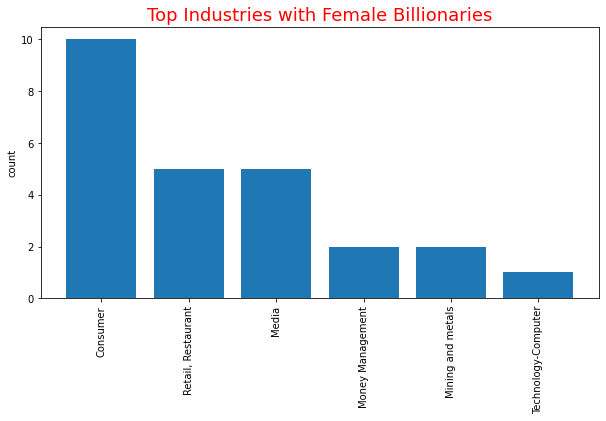

In [23]:
#Question 3: What are the main industries with the highest number of women billionaires?
females =df[df['gender']=='female']
industries =females['industry'].iloc[0:25].value_counts().to_frame()
# industries=females['company.name'].value_counts().to_frame()
x_axis_females=np.arange(len(industries))
plt.figure(dpi=300)
plt.figure(figsize=(10,5))
plt.bar(industries.index,industries['industry'])
plt.xticks(x_axis_females[0:25],industries.index[0:25], rotation=90)
plt.title("Top Industries with Female Billionaries",fontsize = 18,color='red')
plt.ylabel("count")
plt.show()

<Figure size 1800x1200 with 0 Axes>

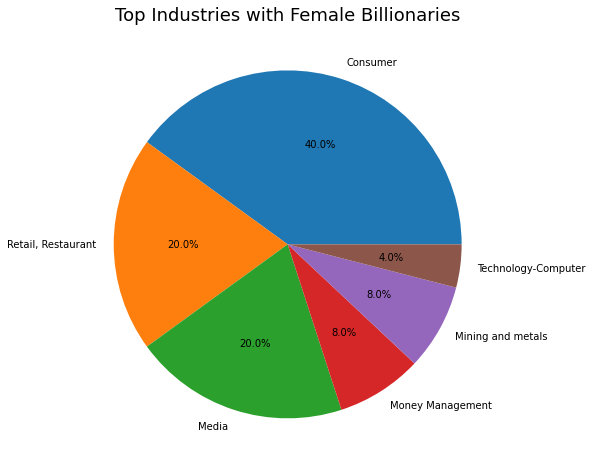

In [24]:
import matplotlib.pyplot as plt

females = df[df['gender']=='female']
industries =females['industry'].iloc[0:25].value_counts().to_frame()
plt.figure(dpi=300)
plt.figure(figsize=(20,8))

plt.pie(industries['industry'], labels=industries.index, autopct='%1.1f%%')
plt.title("Top Industries with Female Billionaries", fontsize = 18)
plt.show()

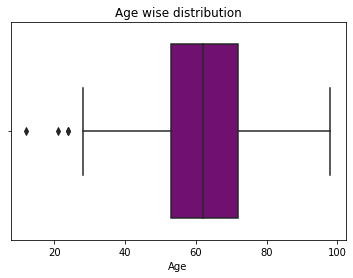

In [25]:
#Question 4: What age range represents the highest and lowest number of billionaires?
sns.boxplot(x=df['age'], color='purple')
plt.xlabel('Age')
plt.title('Age wise distribution')
plt.show()

Age Distribution

It has been found that billionaires’ ages are between 20 years to 100 years. Further these ages have been plotted within groups of 10 years, as a result it has been found that most number of billionaires are in the range of 60 years to 70 years, and the least number of billionaires are in the range of 20 years to 30 years. 

<Figure size 1800x1200 with 0 Axes>

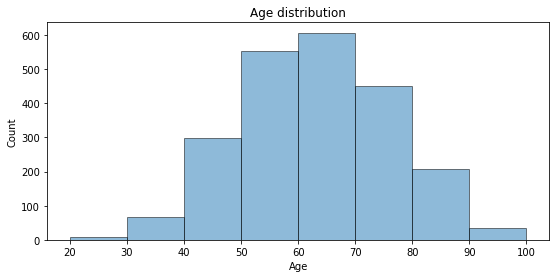

In [26]:
age=df['age']
bins=np.arange(20,110,10)
plt.figure(dpi=300)
plt.figure(figsize=(9,4))
plt.hist(age,bins,edgecolor="black", alpha=0.5)  
plt.xticks(bins)
plt.title("Age distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

<Figure size 1800x1200 with 0 Axes>

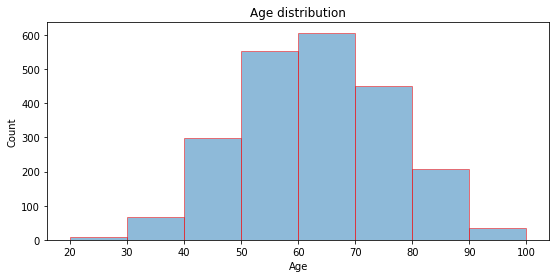

In [27]:
age=df['age']
bins=np.arange(20,110,10)
plt.figure(dpi=300)
plt.figure(figsize=(9,4))
plt.hist(age,bins,edgecolor="red", alpha=0.5)  
plt.xticks(bins)
plt.title("Age distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

In [28]:
wealth_source = df.groupby(['wealth.how.inherited'])['wealth.worth in billions'].sum().sort_values(ascending=False).head(15)

In [29]:
fig8 = px.bar( wealth_source, x=wealth_source.index, y='wealth.worth in billions')
fig8.update_layout(title_text='Relationship between wealth and inheritance',
                 yaxis=dict(title='USD (bilions)', titlefont_size=16, tickfont_size=14))
fig8.show()

In [30]:
#Hypothesis
#NULL Hypothesis (H0): There is no statistically significant difference in the average net worth of billionaires between the regions.Alternative Hypothesis (Ha): There is a statistically significant difference in the average net worth of billionaires between the regions. This hypothesis can be tested by grouping the data by 'Region' and calculating the mean net worth for each group. Then, using a statistical test (such as a ANOVA) to determine if the difference in means between the groups is statistically significant. If the p-value obtained from the test is less than the significance level (usually 0.05), we reject the null hypothesis and conclude that there is a statistically significant difference in the average net worth of billionaires between the regions.

hypothesis = df.groupby(['region'])['wealth.worth in billions'].mean()


In [31]:
chi2, p_val, _, _ = stats.chi2_contingency(hypothesis)

In [32]:
print(p_val)

1.0


In [33]:
if p_val < 0.05:
    print("Reject the null hypothesis, There is a statistically significant difference in the average net worth of billionaires between the regions.")
else:
    print("Failed to reject the null hypothesis, There is no statistically significant difference in the average net worth of billionaires between the regions.")

Failed to reject the null hypothesis, There is no statistically significant difference in the average net worth of billionaires between the regions.


NULL Hypothesis (H0): There is no statistically significant difference in the number of female billionaires between different industries.

Alternative Hypothesis (Ha): There is a statistically significant difference in the number of female billionaires between different industries.

This hypothesis can be tested by grouping the data by 'Industry' and counting the number of female billionaires for each group. Then, using a statistical test (such as a chi-squared test) to determine if the distribution of female billionaires between the industries is statistically significant. If the p-value obtained from the test is less than the significance level (usually 0.05), we reject the null hypothesis and conclude that there is a statistically significant difference in the number of female billionaires between different industries.

In [34]:
female = df.groupby([df['gender'] == 'female'])['wealth.worth in billions'].count()

In [35]:
chi2, p_val, _, _ = stats.chi2_contingency(female)

In [36]:
if p_val < 0.05:
    print("Reject the null hypothesis, There is a statistically significant difference in the number of female billionaires between different industries.")
else:
    print("Accept the null hypothesis, There is no statistically significant difference in the number of female billionaires between different industries.")

Accept the null hypothesis, There is no statistically significant difference in the number of female billionaires between different industries.


NULL Hypothesis (H0): There is no statistically significant difference in the number of billionaires between the different sectors.

Alternative Hypothesis (Ha): There is a statistically significant difference in the number of billionaires between the different sectors.

This hypothesis can be tested by grouping the data by 'Sector' and counting the number of billionaires for each group. Then, using a statistical test (such as a chi-squared test) to determine if the distribution of billionaires between the sectors is statistically significant. If the p-value obtained from the test is less than the significance level (usually 0.05), we reject the null hypothesis and conclude that there is a statistically significant difference in the number of billionaires between the different sectors.

In [37]:
namevsindustry = df.groupby(['industry'])['name'].nunique()

In [38]:
chi2, p_val, _, _ = stats.chi2_contingency(namevsindustry)

In [39]:
if p_val < 0.05:
    print("Reject the null hypothesis, There is a statistically significant difference in the number of billionaires between the different sectors.")
else:
    print("Failed to reject the null hypothesis, There is no statistically significant difference in the number of billionaires between the different sectors.")

Failed to reject the null hypothesis, There is no statistically significant difference in the number of billionaires between the different sectors.


In [40]:
fig8 = px.bar( namevsindustry, x=namevsindustry.index, y='name')
fig8.update_layout(title_text='Relationship ',
                 yaxis=dict(title='USD (bilions)', titlefont_size=16, tickfont_size=14))
fig8.show()

**Evaluation and Future Development**


Future works on this dataset could include a detailed analysis of the global billionaires from 1996 to 2014. This would allow us to evaluate the changes in the number of billionaires, the countries with the highest number of billionaires, and the industries that have the most successful billionaires. Additionally, we can investigate the age range that represents the highest number of billionaires and the factors that influence wealth. The latest technologies that could be used to enhance and develop the given solution further include machine learning algorithms and natural language processing.